<a href="https://colab.research.google.com/github/shrishatuladhar/AI-ML/blob/main/ShrishaTuladhar_Worksheet08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Shrisha Tuladhar**
**Group: L6CG7**

# **WORKSHEET 8**

## **1. Load Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Ai ML/Week8/trum_tweet_sentiment_analysis.csv")

print(df.head())


                                                text  Sentiment
0  RT @JohnLeguizamo: #trump not draining swamp b...          0
1  ICYMI: Hackers Rig FM Radio Stations To Play A...          0
2  Trump protests: LGBTQ rally in New York https:...          1
3  "Hi I'm Piers Morgan. David Beckham is awful b...          0
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...          0


## **2. Text Cleaning and Preprocessing**

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

df = pd.read_csv("/content/drive/MyDrive/Ai ML/Week8/trum_tweet_sentiment_analysis.csv")

print(df.head())

def preprocess_text(text):
    text = str(text).lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'@\w+|\#\w+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]

    return ' '.join(lemmatized_text)

df['cleaned_text'] = df['text'].apply(preprocess_text)

print("\nSample cleaned text:\n", df['cleaned_text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  Sentiment
0  RT @JohnLeguizamo: #trump not draining swamp b...          0
1  ICYMI: Hackers Rig FM Radio Stations To Play A...          0
2  Trump protests: LGBTQ rally in New York https:...          1
3  "Hi I'm Piers Morgan. David Beckham is awful b...          0
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...          0

Sample cleaned text:
 0    rt draining swamp taxpayer dollar trip adverti...
1    icymi hacker rig fm radio station play antitru...
2               trump protest lgbtq rally new york via
3    hi im pier morgan david beckham awful donald t...
4    rt tech firm suing buzzfeed publishing unverif...
Name: cleaned_text, dtype: object


<ipython-input-18-a205e7bd6533>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


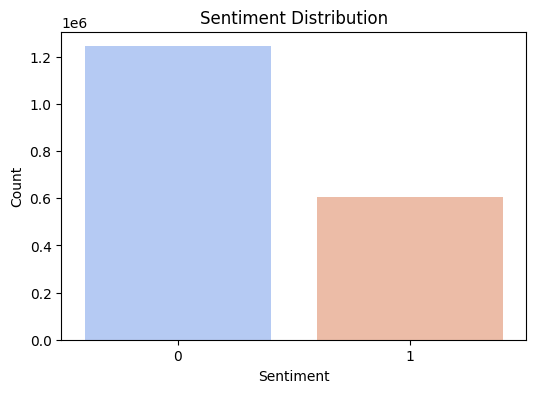

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


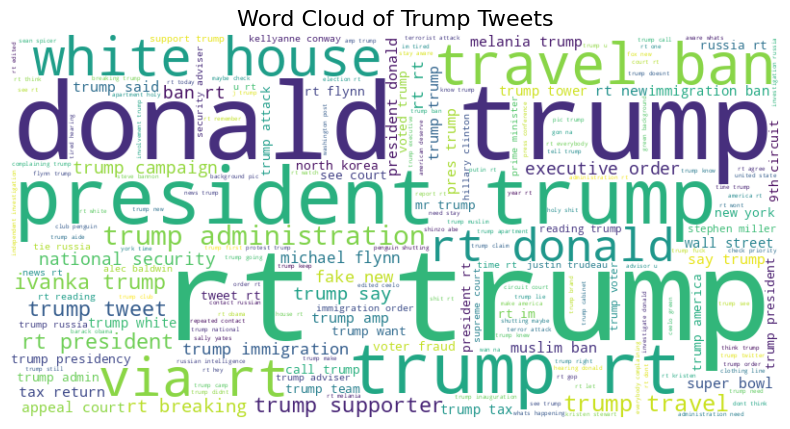

In [ ]:
text_combined = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Trump Tweets", fontsize=16)
plt.show()


## **3. Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 1480098
Test set size: 370025


## **4. TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nTF-IDF Shape (Train):", X_train_tfidf.shape)
print("TF-IDF Shape (Test):", X_test_tfidf.shape)


TF-IDF Shape (Train): (1480098, 5000)
TF-IDF Shape (Test): (370025, 5000)


## **5. Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train_tfidf, y_train)

print("\nModel trained successfully!")


Model trained successfully!


## **6. Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94    248563
           1       0.90      0.86      0.88    121462

    accuracy                           0.92    370025
   macro avg       0.92      0.91      0.91    370025
weighted avg       0.92      0.92      0.92    370025




Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94    248563
           1       0.90      0.86      0.88    121462

    accuracy                           0.92    370025
   macro avg       0.92      0.91      0.91    370025
weighted avg       0.92      0.92      0.92    370025



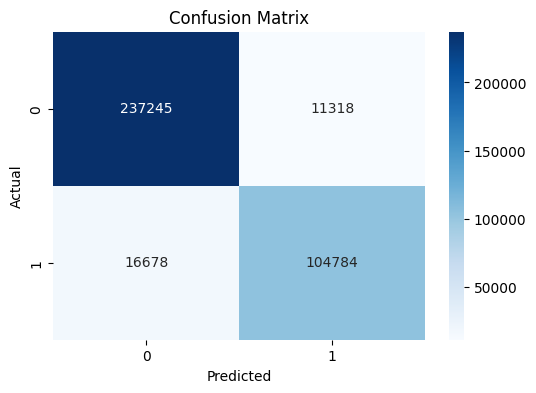

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
